In [3]:
%pylab inline
import sys, numpy as np, scipy as sp, matplotlib.pyplot as plt

sys.path.append('../engine')
sys.path.append('..')

from engine import analog_new as analog

# Forçar o uso de LaTeX
from matplotlib import rc
##rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

Wp = [2 * pi * 300, 2 * pi * 4000]
Ws = [2 * pi * 100, 2 * pi * 6000]
Gp = 3
Gs = 80
rp = 3

freq_range = 2*pi * np.linspace(1, 8000, 1000)
filter_settings = {'passband_frequency': Wp,
                   'stopband_frequency': Ws,
                   'passband_attenuation': Gp,
                   'stopband_attenuation': Gs}
    

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [4]:
# Design the filters
butter_N, butter_Wn = sp.signal.buttord(Wp, Ws, Gp, Gs, analog=True)
cheby1_N, cheby1_Wn = sp.signal.cheb1ord(Wp, Ws, Gp, Gs, analog=True)
cheby2_N, cheby2_Wn = sp.signal.cheb2ord(Wp, Ws, Gp, Gs, analog=True)
elliptic_N, elliptic_Wn = sp.signal.ellipord(Wp, Ws, Gp, Gs, analog=True)

butter_B, butter_A = sp.signal.butter(butter_N, butter_Wn, btype='bandpass', analog=True, output='ba')
cheby1_B, cheby1_A = sp.signal.cheby1(cheby1_N, rp, cheby1_Wn, btype='bandpass', analog=True, output='ba')
cheby2_B, cheby2_A = sp.signal.cheby2(cheby2_N, Gs, cheby2_Wn, btype='bandpass', analog=True, output='ba')
elliptic_B, elliptic_A = sp.signal.ellip(elliptic_N, rp, Gs, elliptic_Wn, btype='bandpass', analog=True, output='ba')
bessel_B, bessel_A = sp.signal.bessel(min(butter_N,25), butter_Wn, btype='bandpass', analog=True, output='ba')

butter_W, butter_H = sp.signal.freqs(butter_B, butter_A, worN=freq_range)
cheby1_W, cheby1_H = sp.signal.freqs(cheby1_B, cheby1_A, worN=freq_range)
cheby2_W, cheby2_H = sp.signal.freqs(cheby2_B, cheby2_A, worN=freq_range)
elliptic_W, elliptic_H = sp.signal.freqs(elliptic_B, elliptic_A, worN=freq_range)
bessel_W, bessel_H = sp.signal.freqs(bessel_B, bessel_A, worN=freq_range)


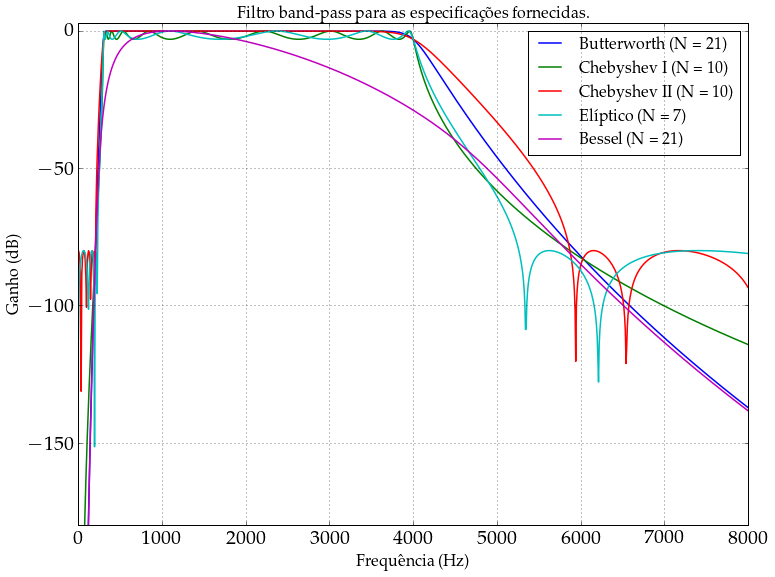

In [5]:
fig = plt.figure(1, figsize=(12, 9))

plt.plot(butter_W / (2 * np.pi), 20 * np.log10(abs(butter_H)), linewidth=1.5)
plt.plot(cheby1_W / (2 * np.pi), 20 * np.log10(abs(cheby1_H)), linewidth=1.5)
plt.plot(cheby2_W / (2 * np.pi), 20 * np.log10(abs(cheby2_H)), linewidth=1.5)
plt.plot(elliptic_W / (2 * np.pi), 20 * np.log10(abs(elliptic_H)), linewidth=1.5)
plt.plot(bessel_W / (2 * np.pi), 20 * np.log10(abs(bessel_H)), linewidth=1.5)
plt.axis([0, 8000, -180, 3])
plt.legend(["Butterworth (N = {})".format(butter_N), "Chebyshev I (N = {})".format(cheby1_N), 
            "Chebyshev II (N = {})".format(cheby2_N), "El\\'iptico (N = {})".format(elliptic_N), 
            "Bessel (N = {})".format(butter_N)], fontsize=16)
plt.xlabel("Frequ\^encia (Hz)", fontsize=16)
plt.ylabel("Ganho (dB)", fontsize=16)
plt.title("Filtro band-pass para as especifica\c{c}\~oes fornecidas.", fontsize=16)
plt.grid()
plt.savefig('bandpass_analog.eps')